In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [5]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [6]:
# # print)str
# scaled_x_train=pd.read_csv("scaled_x_train_smote2.csv")
# scaled_x_test=pd.read_csv("scaled_x_test_smote2.csv")
# # pd.read_csv("scaled_x_test_smote2.csv")
# scaled_x_cv=pd.read_csv("scaled_x_cv_smote2.csv")

In [11]:
y_test_copy=pd.read_csv("y_test_smote3.csv")
x_test=pd.read_csv("x_test_smote3.csv")

In [12]:
X_train_res=pd.read_csv("X_train_res_smote3.csv")
y_train_res=pd.read_csv("y_train_res_smote3.csv")

In [13]:
X_train_res=X_train_res.drop('Unnamed: 0',axis=1)
y_train_res=y_train_res.drop('Unnamed: 0',axis=1)
x_test=x_test.drop('Unnamed: 0',axis=1)


In [14]:
y_test_copy=y_test_copy.drop('Unnamed: 0',axis=1)
# scaled_x_test=scaled_x_test.drop('Unnamed: 0',axis=1)
# scaled_x_cv=scaled_x_cv.drop('Unnamed: 0',axis=1)


In [34]:
y_test=y_test_copy

In [18]:
y_valid=pd.read_csv("y_valid_smote3.csv")
x_valid=pd.read_csv("x_valid_smote3.csv")

In [26]:
x_valid=x_valid.drop('Unnamed: 0',axis=1)
y_valid=y_valid.drop('Unnamed: 0',axis=1)

In [54]:
y_valid.shape

(2026, 1)

In [27]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

In [39]:
scaled_x_train.shape



(7675, 32)

In [ ]:
y_train_res.shape

In [41]:
input_shape=[scaled_x_train.shape[1]]

In [42]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model

import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

from sklearn import metrics

# tfidf_vector_X = xtrain_tfidf_ngram.toarray()  #//shape - (3,6)
# tfidf_vector_valid= xvalid_tfidf_ngram.toarray() #//shape - (3,6)
# tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


# tfidf_vector_X.shape[1:]

from tensorflow import keras
from tensorflow.keras import layers

# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)




In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [ ]:
# y_test

In [ ]:
y_test=y_test_copy['Attrition_Flag']

In [32]:
y_train_res['Attrition_Flag']=y_train_res['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [ ]:
y_train_res=y_train_res['Attrition_Flag']

In [36]:
y_test['Attrition_Flag']=y_test['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})


In [44]:
scaled_x_train.shape

(7675, 32)

In [ ]:
y_test_01.shape

In [43]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model =  KerasClassifier(build_fn=create_model, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN = GridSearchCV(estimator = model, param_grid = param_grid)

model.get_params()

history = gridNN.fit(
     scaled_x_train, y_train_res,
    validation_data=(scaled_x_test, y_test),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)



AttributeError: 'GridSearchCV' object has no attribute 'history'

In [58]:
history.best_params_

# print(history.best_score_)

{'hidden_layers': 4, 'learning_rate': 0.001}

In [48]:
y_pred_SVM1 = history.predict(scaled_x_valid)
y_pred_SVM1

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [49]:
def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')

In [55]:
y_valid['Attrition_Flag']=y_valid['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


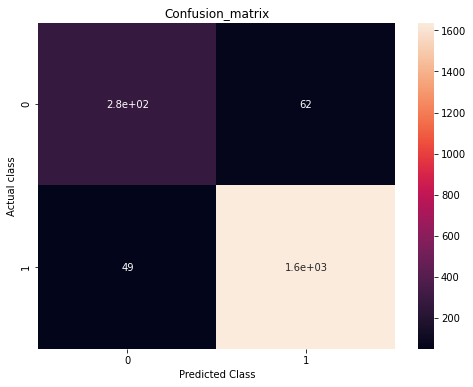

Confusion matrix: 
 [[ 277   62]
 [  49 1638]]
TP:  1638
TN:  277
FP:  62
FN:  49
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       339
           1       0.96      0.97      0.97      1687

    accuracy                           0.95      2026
   macro avg       0.91      0.89      0.90      2026
weighted avg       0.94      0.95      0.94      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 97.98045602605863 %
Training Precision: 98.4759671746776 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Recall: 98.49521203830369 %
Training F1 Score: 98.48558866634097 %
Validation Accuracy_Score: 94.52122408687067 %
Validation Precision: 96.35294117647058 %
Validation Recall: 97.0954356846473 %
Validation F1 Score: 96.72276350752878 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:

plotconfusionMatrix(history,y_valid,scaled_x_valid)

getMetrics(history,scaled_x_train,y_train_res,scaled_x_valid,y_valid)

In [63]:
# sess.run(optimizer._lr)
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='relu'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [64]:
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     scaled_x_train, y_train_res,
    validation_data=(scaled_x_valid, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

print(history_Batch_drop_relu.best_params_)

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

{'hidden_layers': 4, 'learning_rate': 0.01}
0.9494462609291077


In [66]:
y_pred_SVM = gridNN_Batch_drop_relu.predict(scaled_x_valid)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_valid, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_valid, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_valid, y_pred_SVM)*100,'%')

Accuracy_Score: 94.91609081934847 %
precision_score: 96.53349001175087 %
recall_score: 97.3918197984588 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [68]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train_res, gridNN_Batch_drop_relu.best_estimator_.predict(scaled_x_train))*100,'%')
print('Training Recall:',metrics.recall_score(y_train_res, gridNN_Batch_drop_relu.best_estimator_.predict(scaled_x_train))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train_res, gridNN_Batch_drop_relu.best_estimator_.predict(scaled_x_train))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train_res, gridNN_Batch_drop_relu.best_estimator_.predict(scaled_x_train))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 97.92833876221498 %
Training Recall: 98.43658393589995 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training precision_score: 98.45582486317436 %
Training F1 Score: 98.44620345939607 %


In [70]:
bestNN=create_modelWithDropBatch(hidden_layers= 4, learning_rate= 0.01)
history2 = bestNN.fit(
     scaled_x_train, y_train_res,
    validation_data=(scaled_x_valid, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)


Epoch 1/200
15/15 [==============================] - 1s 21ms/step - loss: 0.7153 - accuracy: 0.5262 - val_loss: 0.5355 - val_accuracy: 0.8327
Epoch 2/200
15/15 [==============================] - 0s 8ms/step - loss: 0.5636 - accuracy: 0.7089 - val_loss: 0.4293 - val_accuracy: 0.8327
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.4996 - accuracy: 0.7538 - val_loss: 0.3426 - val_accuracy: 0.8845
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4252 - accuracy: 0.8052 - val_loss: 0.3210 - val_accuracy: 0.8692
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3766 - accuracy: 0.8380 - val_loss: 0.4685 - val_accuracy: 0.8346
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3289 - accuracy: 0.8717 - val_loss: 0.5585 - val_accuracy: 0.8327
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3201 - accuracy: 0.8830 - val_loss: 0.6230 - val_accuracy: 0.8327
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1900 - accuracy: 0.9345 - val_loss: 0.2100 - val_accuracy: 0.9176
Epoch 60/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1929 - accuracy: 0.9326 - val_loss: 0.1853 - val_accuracy: 0.9304
Epoch 61/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1969 - accuracy: 0.9275 - val_loss: 0.1918 - val_accuracy: 0.9255
Epoch 62/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1866 - accuracy: 0.9271 - val_loss: 0.1807 - val_accuracy: 0.9294
Epoch 63/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1861 - accuracy: 0.9326 - val_loss: 0.1848 - val_accuracy: 0.9319
Epoch 64/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1805 - accuracy: 0.9355 - val_loss: 0.1858 - val_accuracy: 0.9274
Epoch 65/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1967 - accuracy: 0.9294 - val_loss: 0.1818 - val_accuracy: 0.9299
Epoch 

15/15 [==============================] - 0s 7ms/step - loss: 0.1491 - accuracy: 0.9484 - val_loss: 0.1694 - val_accuracy: 0.9408
Epoch 117/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1543 - accuracy: 0.9434 - val_loss: 0.1775 - val_accuracy: 0.9344
Epoch 118/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1587 - accuracy: 0.9446 - val_loss: 0.1682 - val_accuracy: 0.9427
Epoch 119/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1581 - accuracy: 0.9457 - val_loss: 0.1659 - val_accuracy: 0.9427
Epoch 120/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1432 - accuracy: 0.9526 - val_loss: 0.1665 - val_accuracy: 0.9413
Epoch 121/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1564 - accuracy: 0.9412 - val_loss: 0.1666 - val_accuracy: 0.9358
Epoch 122/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1412 - accuracy: 0.9503 - val_loss: 0.1635 - val_accuracy: 0.9427
Epoch 123/200

15/15 [==============================] - 0s 8ms/step - loss: 0.1446 - accuracy: 0.9504 - val_loss: 0.1689 - val_accuracy: 0.9378
Epoch 174/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1279 - accuracy: 0.9541 - val_loss: 0.1606 - val_accuracy: 0.9452
Epoch 175/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1298 - accuracy: 0.9558 - val_loss: 0.1627 - val_accuracy: 0.9437
Epoch 176/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1474 - accuracy: 0.9506 - val_loss: 0.1628 - val_accuracy: 0.9462
Epoch 177/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1256 - accuracy: 0.9562 - val_loss: 0.1581 - val_accuracy: 0.9437
Epoch 178/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1326 - accuracy: 0.9566 - val_loss: 0.1763 - val_accuracy: 0.9423
Epoch 179/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1257 - accuracy: 0.9562 - val_loss: 0.1534 - val_accuracy: 0.9432
Epoch 180/200

<AxesSubplot:title={'center':'Accuracy'}>

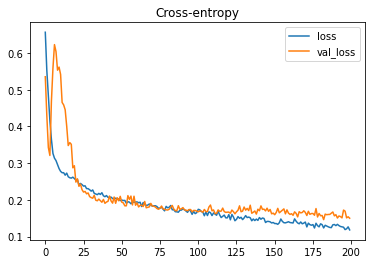

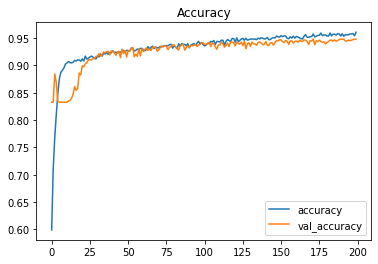

In [71]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [72]:
bestNNearly=create_modelWithDropBatch(hidden_layers= 4, learning_rate= 0.01)
history2 = bestNN.fit(
     scaled_x_train, y_train_res,
    validation_data=(scaled_x_valid, y_valid),
    batch_size=512,
    epochs=100,
#     callbacks=[early_stopping],
)


Epoch 1/100
15/15 [==============================] - 0s 10ms/step - loss: 0.1199 - accuracy: 0.9600 - val_loss: 0.1566 - val_accuracy: 0.9472
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1230 - accuracy: 0.9584 - val_loss: 0.1576 - val_accuracy: 0.9506
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1262 - accuracy: 0.9562 - val_loss: 0.1661 - val_accuracy: 0.9427
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1260 - accuracy: 0.9537 - val_loss: 0.1514 - val_accuracy: 0.9447
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1213 - accuracy: 0.9601 - val_loss: 0.1551 - val_accuracy: 0.9467
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1191 - accuracy: 0.9574 - val_loss: 0.1469 - val_accuracy: 0.9521
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1288 - accuracy: 0.9565 - val_loss: 0.1645 - val_accuracy: 0.9482
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1064 - accuracy: 0.9629 - val_loss: 0.1528 - val_accuracy: 0.9487
Epoch 60/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1133 - accuracy: 0.9618 - val_loss: 0.1583 - val_accuracy: 0.9408
Epoch 61/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1086 - accuracy: 0.9593 - val_loss: 0.1596 - val_accuracy: 0.9462
Epoch 62/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1012 - accuracy: 0.9661 - val_loss: 0.1438 - val_accuracy: 0.9472
Epoch 63/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1105 - accuracy: 0.9631 - val_loss: 0.1379 - val_accuracy: 0.9536
Epoch 64/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1099 - accuracy: 0.9622 - val_loss: 0.1435 - val_accuracy: 0.9487
Epoch 65/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1028 - accuracy: 0.9630 - val_loss: 0.1534 - val_accuracy: 0.9437
Epoch 

In [79]:
y_pred_SVM

array([[0.46771336],
       [0.47653824],
       [0.46967372],
       ...,
       [0.44663817],
       [0.44256306],
       [0.4581063 ]], dtype=float32)

In [83]:
y_pred_SVM = bestNN.predict_classes(scaled_x_valid)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_valid, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_valid, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_valid, y_pred_SVM)*100,'%')

print('Training Accuracy_Score:',metrics.accuracy_score(y_train_res, bestNN.predict_classes(scaled_x_train))*100,'%')
print('Training Recall:',metrics.recall_score(y_train_res, bestNN.predict_classes(scaled_x_train))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train_res, bestNN.predict_classes(scaled_x_train))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train_res, bestNN.predict_classes(scaled_x_train))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Accuracy_Score: 94.86673247778874 %
precision_score: 95.67224466243508 %
recall_score: 98.2809721398933 %
Training Accuracy_Score: 98.95765472312704 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Recall: 99.57006058237249 %
Training precision_score: 98.87444207257909 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 99.22103213242454 %


In [82]:
y_pred_SVM = bestNNearly.predict_classes(scaled_x_valid)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_valid, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_valid, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_valid, y_pred_SVM)*100,'%')

print('Training Accuracy_Score:',metrics.accuracy_score(y_train_res, bestNNearly.predict_classes(scaled_x_train))*100,'%')
print('Training Recall:',metrics.recall_score(y_train_res, bestNNearly.predict_classes(scaled_x_train))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train_res, bestNNearly.predict_classes(scaled_x_train))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train_res, bestNNearly.predict_classes(scaled_x_train))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/pytho

Accuracy_Score: 16.732477788746298 %
precision_score: 0.0 %
recall_score: 0.0 %
Training Accuracy_Score: 33.328990228013026 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Recall: 0.0 %
Training precision_score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 0.0 %


In [88]:
# from sklearn.model_selection import learning_curve

In [84]:
print('testing Accuracy_Score:',metrics.accuracy_score(y_test, bestNN.predict_classes(scaled_x_test))*100,'%')
print('testing Recall:',metrics.recall_score(y_test, bestNN.predict_classes(scaled_x_test))*100,'%')
print('testing precision_score:',metrics.precision_score(y_test, bestNN.predict_classes(scaled_x_test))*100,'%')
print('testing F1 Score:',metrics.f1_score(y_test, bestNN.predict_classes(scaled_x_test))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

testing Accuracy_Score: 93.87956564659427 %
testing Recall: 97.52358490566037 %
testing precision_score: 95.27649769585254 %
testing F1 Score: 96.38694638694638 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
